In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

In [42]:
#读取源数据
data = pd.read_excel("../DataSource/result.xlsx")
# 去除 'source ID' 列
data = data.drop('source ID', axis=1)

In [77]:
# 创建DBSCAN聚类对象
#eps（Epsilon）：邻域半径。它定义了一个样本点的邻域范围，即以样本点为中心的圆形区域的半径大小。该参数用于确定哪些样本点被认为是直接密度可达的邻居点。

# min_samples（最小样本数）：用于定义核心点的最小样本数。一个样本点被认为是核心点，
# 需要满足其邻域内（以 eps 为半径）包含的样本点数目大于或等于 min_samples。
# 对于核心点，其邻域内的所有样本点都被认为是直接密度可达的。
dbscan = DBSCAN(eps=7.0, min_samples=1)

# 执行聚类
clusters = dbscan.fit_predict(data)

In [78]:
print(clusters)

[0 0 0 0 0 0 0 1 2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 6 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0]


In [79]:
# 生成聚类标签
clustering_labels = np.array([f'Cluster {label}' for label in clusters])

# 获取聚类中心
clustering_center = np.mean(data, axis=0)

In [80]:
# 打印聚类结果和聚类中心
print("Clustering Labels:", clustering_labels)
print("Clustering Center:", clustering_center)

Clustering Labels: ['Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 1' 'Cluster 2' 'Cluster 0' 'Cluster 0' 'Cluster 3'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 4'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 5' 'Cluster 0' 'Cluster 6' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0' 'Cluster 0'
 'Cluster 0' 'Cluster 0' 'Cluste

In [82]:
from sklearn.metrics import silhouette_score
# 计算轮廓系数
silhouette_avg = silhouette_score(data, clustering_labels)
print("轮廓系数:", silhouette_avg)

轮廓系数: 0.2922269062133214


In [84]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np

# 计算样本间的距离矩阵
distance_matrix = pairwise_distances(data)

# 计算类别内的最小距离
min_distances = np.min(distance_matrix[np.nonzero(distance_matrix)])

# 计算类间的最大距离
max_distances = np.max(distance_matrix)

# 计算Dunn指数
dunn_index = min_distances / max_distances

# 计算DB指数
db_index = davies_bouldin_score(data, clusters)

# 打印指数
print("Dunn Index:", dunn_index)
print("DB Index:", db_index)

Dunn Index: 0.12309149097933274
DB Index: 0.47834483184524806


## 可视化

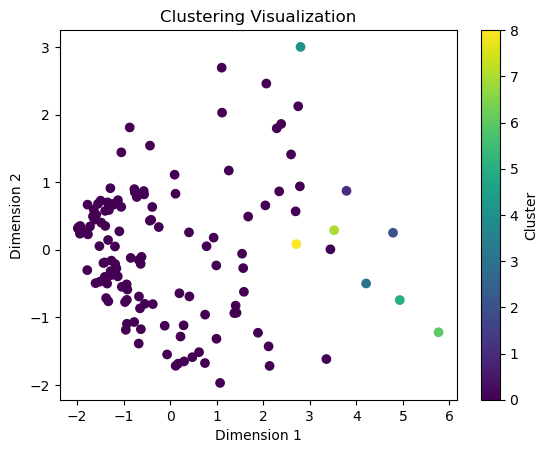

In [85]:
import matplotlib.pyplot as plt

# 使用降维方法如PCA将数据映射到二维空间
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 绘制散点图，颜色表示聚类结果
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()